In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import scipy as sp
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
#read in task df

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PR_r2/LP_train_prepro.csv'
    
task_data = pd.read_csv(path_task, index_col=0)
task_data = pd.DataFrame(data = task_data)

print(task_data.shape)

task_data.head()

(4022, 21)


,date,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_duration,reinforcement_count,reinforcement_latency_1st,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave,right_lever_count,right_lever_latency_1st,left_lever_count,left_lever_latency_1st,reinforcement_latency_ave,right_lever_latency_ave,left_lever_latency_ave
0,200219,FR1_1,1,158,825,1,0,0,219.65,1,219.65,11,172.17,183.023636,1,219.64,0,0.00,219.65,219.64,0.00
1,200219,FR1_1,1,158,825,1,0,1,514.48,1,514.48,49,7.20,216.133673,1,514.47,0,0.00,514.48,514.47,0.00
2,200219,FR1_1,1,158,825,1,0,2,791.69,1,791.69,15,3.23,294.691333,1,791.68,1,679.09,791.69,791.68,679.09
3,200219,FR1_1,1,158,825,1,0,3,1474.55,1,1474.55,98,92.91,518.570918,1,1474.54,0,0.00,1474.55,1474.54,0.00
4,200219,FR1_1,1,158,825,1,0,4,18.84,1,18.84,0,0.00,0.000000,1,18.83,0,0.00,18.84,18.83,0.00


In [3]:
#make new df with combined data
df_final = task_data.copy()

lp_train_df_trial = pd.DataFrame()

animals = df_final['animal_number'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        #compute and fill session data
        if animal_data_session['active_lever'].unique() == 0:
            animal_data_session['active_lever_count'] = animal_data_session['right_lever_count']
            animal_data_session['active_lever_latency_1st'] = animal_data_session['right_lever_latency_1st']
            animal_data_session['active_lever_latency_ave'] = animal_data_session['right_lever_latency_ave']
            animal_data_session['inactive_lever_count'] = animal_data_session['left_lever_count']
            animal_data_session['inactive_lever_latency_1st'] = animal_data_session['left_lever_latency_1st']
            animal_data_session['inactive_lever_latency_ave'] = animal_data_session['left_lever_latency_ave']

        elif animal_data_session['active_lever'].unique() == 1:
            animal_data_session['active_lever_count'] = animal_data_session['left_lever_count']
            animal_data_session['active_lever_latency_1st'] = animal_data_session['left_lever_latency_1st']
            animal_data_session['active_lever_latency_ave'] = animal_data_session['left_lever_latency_ave']
            animal_data_session['inactive_lever_count'] = animal_data_session['right_lever_count']
            animal_data_session['inactive_lever_latency_1st'] = animal_data_session['right_lever_latency_1st']
            animal_data_session['inactive_lever_latency_ave'] = animal_data_session['right_lever_latency_ave']
            
        lp_train_df_trial = lp_train_df_trial.append(animal_data_session)
        
lp_train_df_trial.reset_index(inplace=True, drop=True)    

lp_train_df_trial = lp_train_df_trial[['date', 'session', 'session_num', 'cage', 'animal_number', 'group',
                                       'active_lever', 'trial_num', 'trial_duration',
                                       'reinforcement_count', 'reinforcement_latency_1st',
                                       'HE_trial_count', 'HE_trial_latency_1st', 'HE_trial_latency_ave',
                                       'active_lever_count', 'active_lever_latency_1st',
                                       'inactive_lever_count', 'inactive_lever_latency_1st', 
                                       'active_lever_latency_ave', 'inactive_lever_latency_ave', 'reinforcement_latency_ave']]

print(lp_train_df_trial.shape)
lp_train_df_trial.head()

(4022, 21)


,date,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_duration,reinforcement_count,reinforcement_latency_1st,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200219,FR1_1,1,158,825,1,0,0,219.65,1,219.65,11,172.17,183.023636,1,219.64,0,0.00,219.64,0.00,219.65
1,200219,FR1_1,1,158,825,1,0,1,514.48,1,514.48,49,7.20,216.133673,1,514.47,0,0.00,514.47,0.00,514.48
2,200219,FR1_1,1,158,825,1,0,2,791.69,1,791.69,15,3.23,294.691333,1,791.68,1,679.09,791.68,679.09,791.69
3,200219,FR1_1,1,158,825,1,0,3,1474.55,1,1474.55,98,92.91,518.570918,1,1474.54,0,0.00,1474.54,0.00,1474.55
4,200219,FR1_1,1,158,825,1,0,4,18.84,1,18.84,0,0.00,0.000000,1,18.83,0,0.00,18.83,0.00,18.84


In [ ]:
#create df with trials unstacked and save
lp_train_df_trial_unstack = lp_train_df_trial.set_index(['date', 'session', 'session_num', 'cage', 'animal_number', 'group', 'active_lever', 'trial_num'])

lp_train_df_trial_unstack = lp_train_df_trial_unstack.unstack(-1).reset_index()

lp_train_df_trial_unstack.head()

In [ ]:
#create df with sum and mean of each session and save

lp_train_df_trial_sum = lp_train_df_trial.groupby(['session', 'group', 'animal_number']).sum().reset_index()

lp_train_df_trial_ave = lp_train_df_trial.groupby(['session', 'group', 'animal_number']).mean().reset_index()

lp_train_df_trial_ave.head()

params = ['trial_num', 'trial_duration',
       'reinforcement_count', 'reinforcement_latency_1st',
       'HE_trial_count', 'HE_trial_latency_1st', 'HE_trial_latency_ave',
       'active_lever_count', 'active_lever_latency_1st',
       'inactive_lever_count', 'inactive_lever_latency_1st',
       'active_lever_latency_ave', 'inactive_lever_latency_ave',
       'reinforcement_latency_ave']

In [60]:
lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['active_lever_latency_1st'].mean().head()

session  group  animal_number
FR1_1    1      825              603.832000
                826               38.150000
                827               90.214667
                828              456.278571
                829              452.350000
Name: active_lever_latency_1st, dtype: float64

In [78]:
lp_sum_ratio_df.head()

,session,group,animal_number,ratio
0,FR1_1,1,825,5.000000
1,FR1_1,1,826,2.523810
2,FR1_1,1,827,1.200000
3,FR1_1,1,828,0.583333
4,FR1_1,1,829,1.000000


In [75]:
trial_count_df = (lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['trial_num'].count()).reset_index()
active_lp_sum_df = (lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['active_lever_count'].sum()).reset_index()
inactive_lp_sum_df = (lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['inactive_lever_count'].sum()).reset_index()
he_sum_df = lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['HE_trial_count'].sum().reset_index()
lp_sum_ratio_df = (lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['active_lever_count'].sum() / lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['inactive_lever_count'].sum()).reset_index(name='ratio')


trial_duration_mean_df = lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['trial_duration'].mean().reset_index()
active_lp_lat_mean_df = lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['active_lever_latency_ave'].mean().reset_index()
inactive_lp_lat_mean_df = lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['inactive_lever_latency_ave'].mean().reset_index()
reinf_lat_mean_df = lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['reinforcement_latency_ave'].mean().reset_index()
lp_lat_ratio_df = (lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['active_lever_latency_ave'].mean() / lp_train_df_trial.groupby(['session', 'group', 'animal_number'])['inactive_lever_latency_ave'].mean()).reset_index(name='ratio')


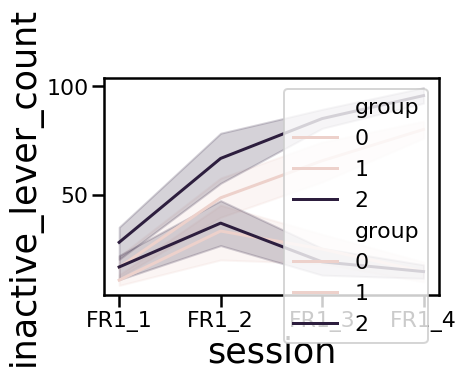

In [81]:
sns.lineplot(x='session', y='active_lever_count', data=active_lp_sum_df, hue='group', ci=68)
sns.lineplot(x='session', y='inactive_lever_count', data=inactive_lp_sum_df, hue='group', ci=68)
plt.show()

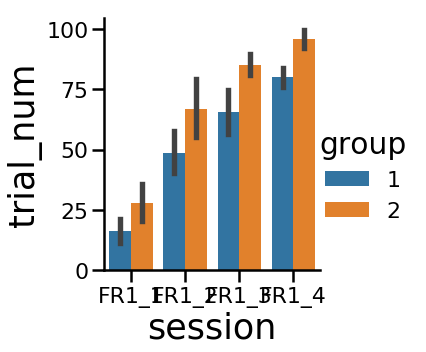

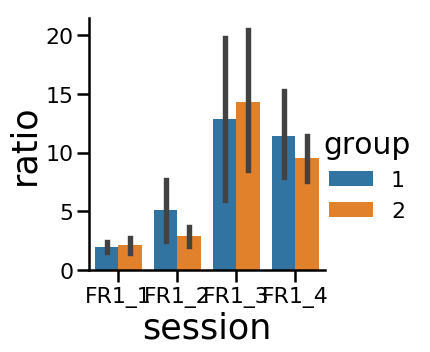

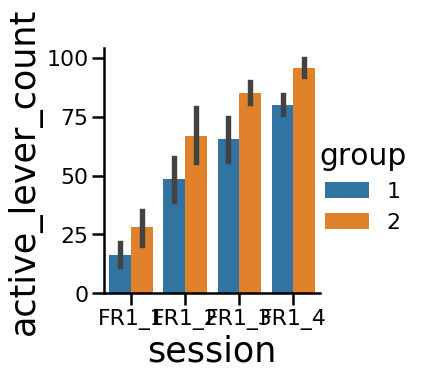

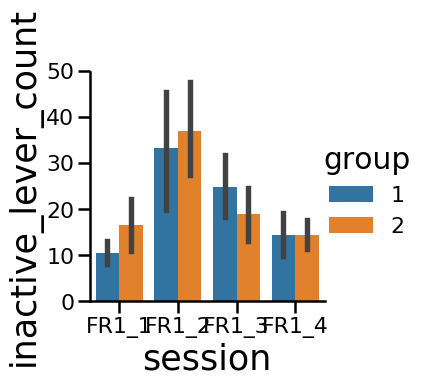

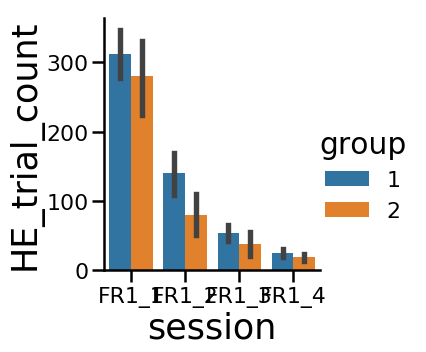

In [77]:
sns.catplot(x='session', y='trial_num', data=trial_count_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='ratio', data=lp_sum_ratio_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='active_lever_count', data=active_lp_sum_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='inactive_lever_count', data=inactive_lp_sum_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='HE_trial_count', data=he_sum_df, hue='group', ci=68, kind='bar')
plt.show()

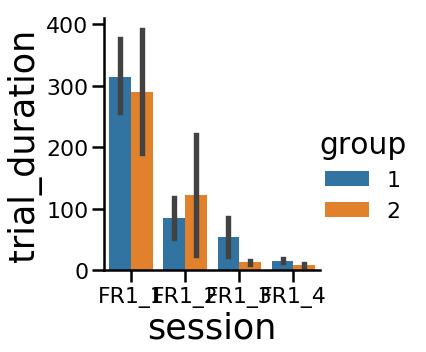

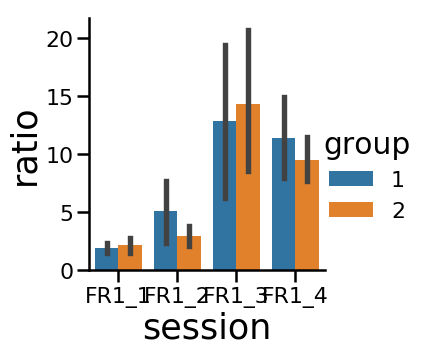

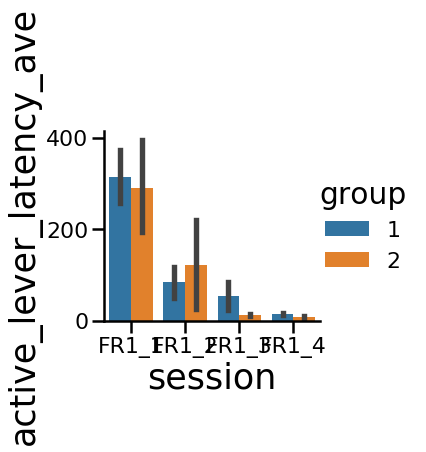

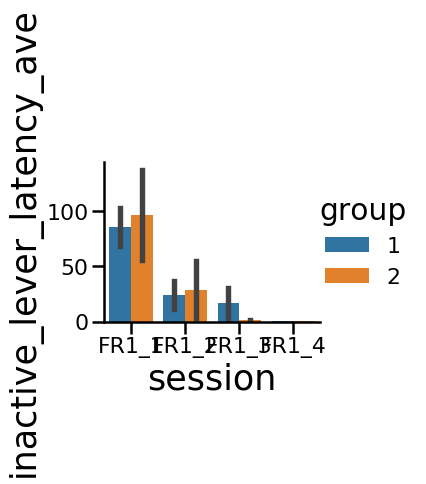

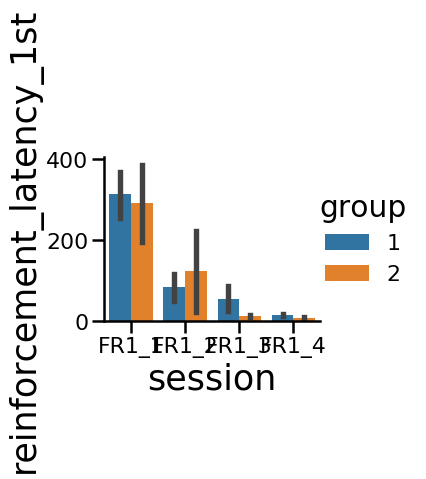

In [76]:
sns.catplot(x='session', y='trial_duration', data=triaL_duration_mean_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='active_lever_latency_ave', data=active_lp_lat_1st_mean_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='inactive_lever_latency_ave', data=inactive_lp_lat_1st_mean_df, hue='group', ci=68, kind='bar')
plt.show()
sns.catplot(x='session', y='reinforcement_latency_1st', data=reinf_lat_1st_mean_df, hue='group', ci=68, kind='bar')
plt.show()

In [ ]:
#save files
lp_train_df_trial_unstack.to_csv('lp_train_df_trial_unstack.csv')
lp_train_df_trial_sum.to_csv('lp_train_df_trial_sum.csv')
lp_train_df_trial_ave.to_csv('lp_train_df_trial_ave.csv')